# Plot fig. 7.21

Theme Song: Untitled #7<br>
Artist: Sigur Rós<br>
Album: ()<br>
Released: 2002

Author: Bill Collins (UK)
Minor changes by Chris Smith

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [2]:
pl.rcParams['figure.figsize'] = (18/2.54, 12.5/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

## Precalculated values

In [3]:
bill_data = {}
with np.load('../data_input/fig7.20/cgtp.npz') as data:
    for file in data.files:
        bill_data[file] = data[file]

In [4]:
bill_data

{'H': array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ]),
 'delT_co2': array([0.00000000e+00, 2.19346565e-17, 4.30870204e-17, ...,
        3.94651829e-16, 3.94624561e-16, 3.94597382e-16]),
 'delT_ch4': array([0.00000000e+00, 2.61026475e-15, 5.12412672e-15, ...,
        2.93612811e-15, 2.93488029e-15, 2.93363608e-15]),
 'delT_hfc32': array([0.00000000e+00, 1.54225454e-13, 3.01223316e-13, ...,
        5.61106278e-14, 5.60872104e-14, 5.60638244e-14]),
 'idelT_ch4': array([0.00000000e+00, 1.31329666e-16, 5.18840650e-16, ...,
        1.40025999e-12, 1.40055354e-12, 1.40084697e-12]),
 'idelT_hfc32': array([0.00000000e+00, 7.77263627e-15, 3.06042428e-14, ...,
        3.66421677e-11, 3.66477776e-11, 3.66533852e-11])}

## Plot

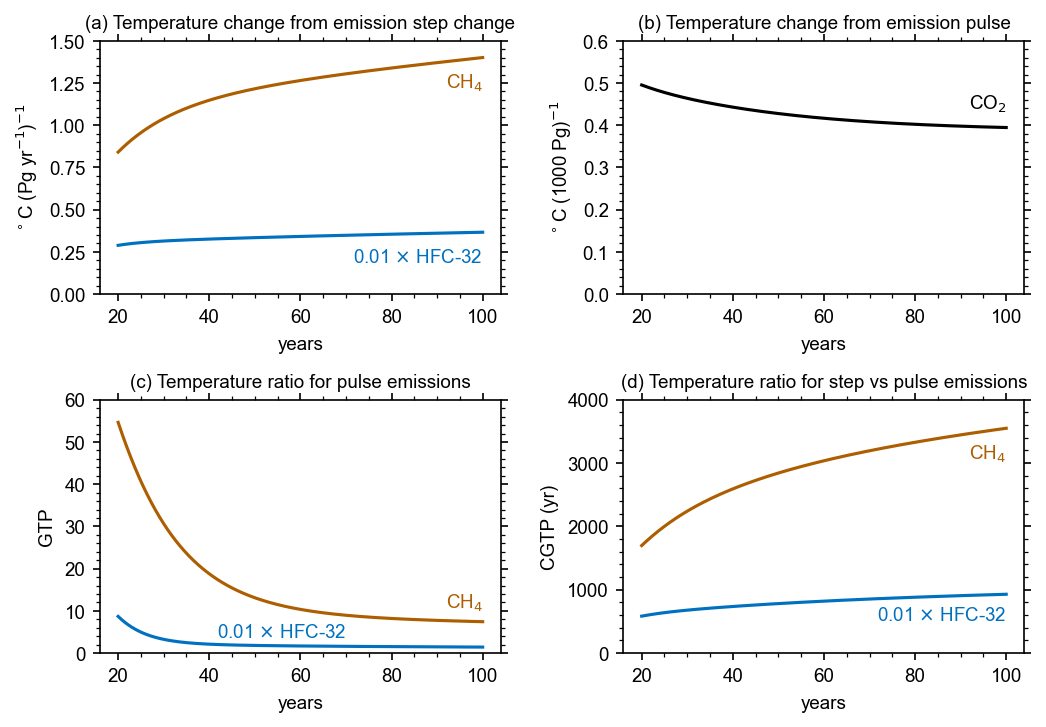

In [5]:
colors = {
    'co2': 'black', #'#7f0089', going to break protocol because the purple looks fugly and weird
    'ch4': '#ad5e00',
    'other_wmghg': '#0070c0',
}

fig, ax = pl.subplots(2, 2)

ax[0,0].plot(bill_data['H'][200:], bill_data['idelT_ch4'][200:]*1e12, color=colors['ch4'])
ax[0,0].text(100, 1.25, 'CH$_4$', color=colors['ch4'], ha='right', va='center')
ax[0,0].plot(bill_data['H'][200:], 0.01*bill_data['idelT_hfc32'][200:]*1e12, color=colors['other_wmghg'])
ax[0,0].text(100, 0.22, r'0.01 $\times$ HFC-32', color=colors['other_wmghg'], ha='right', va='center')
ax[0,0].set_xlabel('years')
ax[0,0].set_ylabel(r'$^\circ$C (Pg yr$^{-1}$)$^{-1}$')
ax[0,0].set_ylim(0., 1.5)
ax[0,0].set_title(r'(a) Temperature change from emission step change', fontsize=9)

ax[0,1].plot(bill_data['H'][200:], bill_data['delT_co2'][200:]*1e15, color=colors['co2'], label='CO$_2$')
ax[0,1].text(100, 0.45, r'CO$_2$', color=colors['co2'], ha='right', va='center')
ax[0,1].set_xlabel('years')
ax[0,1].set_ylabel(r'$^\circ$C (1000 Pg)$^{-1}$')
ax[0,1].set_ylim(0, 0.6)
ax[0,1].set_title(r'(b) Temperature change from emission pulse', fontsize=9)

ax[1,0].plot(bill_data['H'][200:], bill_data['delT_ch4'][200:]/bill_data['delT_co2'][200:], label='CH$_4$', color=colors['ch4'])
ax[1,0].text(100, 12, 'CH$_4$', color=colors['ch4'], ha='right', va='center')
ax[1,0].plot(bill_data['H'][200:], 0.01*bill_data['delT_hfc32'][200:]/bill_data['delT_co2'][200:], label=r'HFC-32 $\times$ 0.01', color=colors['other_wmghg'])
ax[1,0].text(70, 5, r'0.01 $\times$ HFC-32', color=colors['other_wmghg'], ha='right', va='center')
ax[1,0].set_xlabel('years')
ax[1,0].set_ylim(0, 60)
ax[1,0].set_title(r'(c) Temperature ratio for pulse emissions', fontsize=9)
ax[1,0].set_ylabel(r'GTP')
fig.tight_layout()

ax[1,1].plot(bill_data['H'][200:], bill_data['idelT_ch4'][200:]/bill_data['delT_co2'][200:], color=colors['ch4'])
ax[1,1].text(100, 3150, 'CH$_4$', color=colors['ch4'], ha='right', va='center')
ax[1,1].plot(bill_data['H'][200:], 0.01*bill_data['idelT_hfc32'][200:]/bill_data['delT_co2'][200:], color=colors['other_wmghg'])
ax[1,1].text(100, 600, r'0.01 $\times$ HFC-32', color=colors['other_wmghg'], ha='right', va='center')
ax[1,1].set_xlabel('years')
ax[1,1].set_ylabel(r'CGTP (yr)')
ax[1,1].set_ylim(0, 4000)
# plt.yticks([0, 1000, 2000, 3000, 4000])
ax[1,1].set_title(r'(d) Temperature ratio for step vs pulse emissions', fontsize=9)

pl.savefig('../figures/fig7.21.pdf')
pl.savefig('../figures/fig7.21.png', dpi=300)